In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set(rc={'figure.figsize':(15,15)})

In [4]:
df = pd.read_csv('Datasets/all_diseases.csv.gz', parse_dates=['date'])

In [5]:
malaria = df[df.disease.isin(['malaria'])]
malaria = malaria.sort_values(by=['country','year'])

In [6]:
cases_per_year = pd.concat([
    df[~df.disease.isin(['malaria'])].groupby(['disease','year']).no_cases.sum().to_frame('yearly_cases').reset_index(),
    malaria.groupby(['year','disease']).cumulative_cases.sum().to_frame('yearly_cases').reset_index()
])

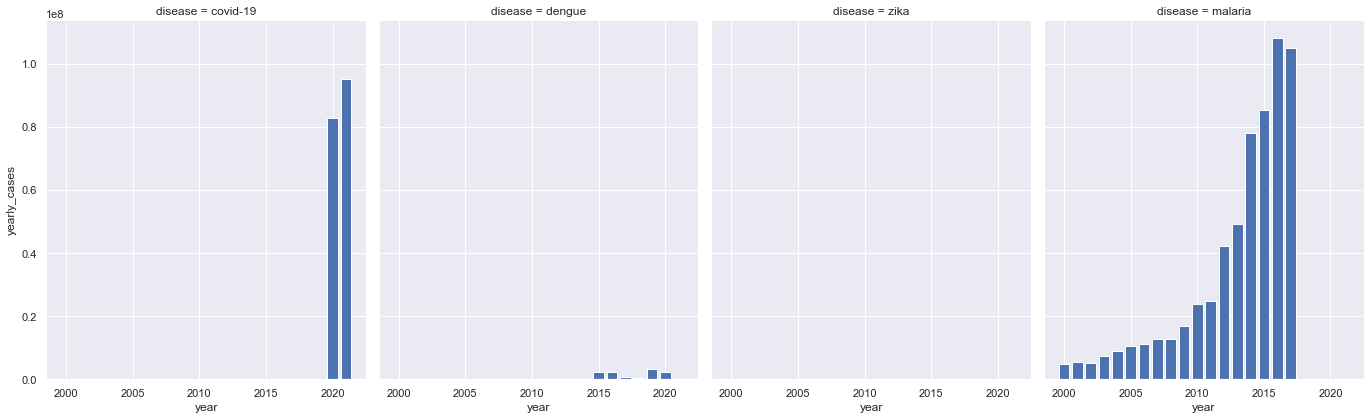

In [20]:
g = sns.FacetGrid(cases_per_year, col='disease', aspect=0.8, height=6)
g.map(plt.bar, 'year','yearly_cases')

<AxesSubplot:xlabel='country'>

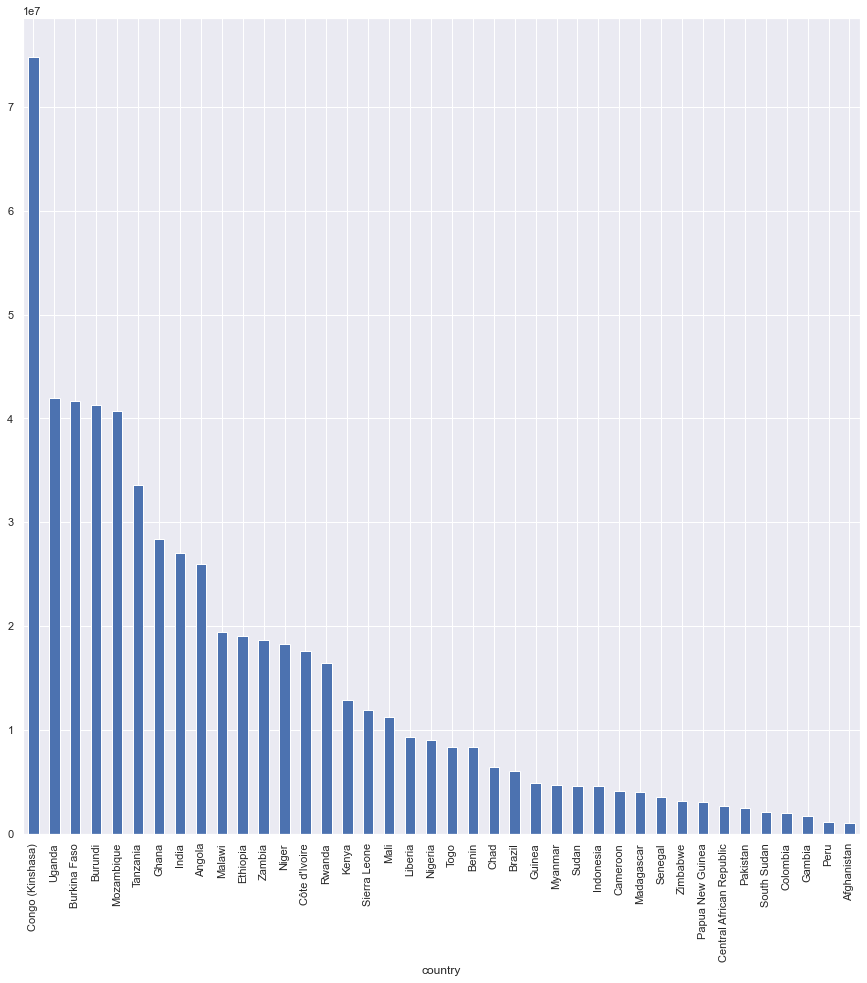

In [10]:
# since the malaria cases are so high and in some years higher than the covid cases globally
# plotting which country has the highest cases - only top 40

malaria[['country','year','cumulative_cases']].groupby('country').cumulative_cases.sum().sort_values(ascending=False).head(40).plot(kind='bar')